# Ejercicio 1 - Preparación del Ambiente de Trabajo

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helpers
import re
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 100)

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv').drop('url',axis=1)

In [3]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# las etiquetas de las columnas presentan un espacio extra, con ésto lo podemos eliminar
df.columns = [i.replace(' ', '') for i in df.columns]
# eliminamos el string de url que no sirve para el análisis
df = df.loc[:, 'n_tokens_title':'shares']
# generamos el conjunto de variables
qnty = df.filter(regex='^n_', axis=1)
channel = df.filter(regex='^data_', axis=1)
days = df.filter(regex=re.compile("weekday|weekend"), axis=1)
sentiments = df.filter(regex=re.compile("negative|positive|subjectivity"),axis=1)
lda = df.filter(regex='^LDA_\d', axis=1)
keywords = df.filter(regex='^kw_', axis=1)

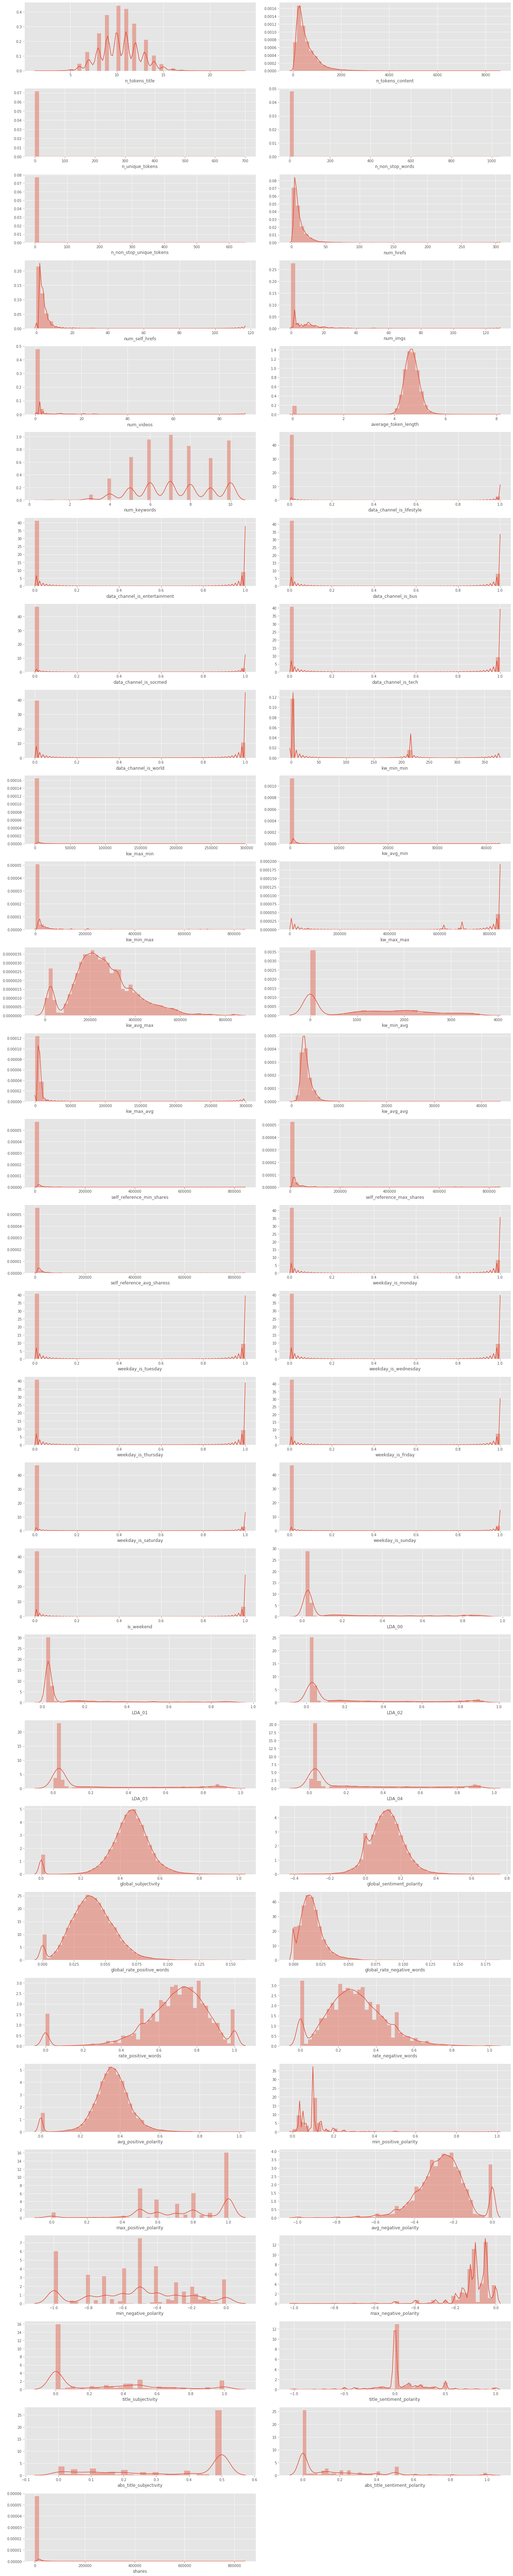

In [5]:
plt.rcParams['figure.figsize'] = (20, 100)
helpers.grid_plot_batch(df,2,sns.distplot)

In [6]:
vif = helpers.identify_high_correlations(df,.8)

In [7]:
list(vif['var2'])

['n_unique_tokens',
 'n_unique_tokens',
 'n_non_stop_words',
 'kw_max_min',
 'kw_min_min',
 'kw_max_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'weekday_is_sunday',
 'data_channel_is_bus',
 'data_channel_is_world',
 'data_channel_is_tech',
 'global_sentiment_polarity',
 'global_rate_negative_words',
 'avg_positive_polarity',
 'avg_negative_polarity',
 'title_subjectivity']

In [8]:
df = df.drop(columns=['n_unique_tokens',
 'n_unique_tokens',
 'n_non_stop_words',
 'kw_max_min',
 'kw_min_min',
 'kw_max_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'weekday_is_sunday',
 'data_channel_is_bus',
 'data_channel_is_world',
 'data_channel_is_tech',
 'global_sentiment_polarity',
 'global_rate_negative_words',
 'avg_positive_polarity',
 'avg_negative_polarity',
 'title_subjectivity'])

In [9]:
helpers.identify_high_correlations(df,0.8)

,variable,var2,value


In [10]:
df.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,rate_positive_words,rate_negative_words,min_positive_polarity,max_positive_polarity,min_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.769231,0.230769,0.100000,0.7,-0.600,-0.200000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.733333,0.266667,0.033333,0.7,-0.125,-0.100000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.857143,0.142857,0.100000,1.0,-0.800,-0.133333,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.666667,0.333333,0.136364,0.8,-0.600,-0.166667,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.860215,0.139785,0.033333,1.0,-0.500,-0.050000,0.136364,0.045455,0.136364,505


In [11]:
df['shares'] = np.where(df['shares'] >= 1400, 1,0)

In [12]:
df.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,rate_positive_words,rate_negative_words,min_positive_polarity,max_positive_polarity,min_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.769231,0.230769,0.100000,0.7,-0.600,-0.200000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.733333,0.266667,0.033333,0.7,-0.125,-0.100000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.857143,0.142857,0.100000,1.0,-0.800,-0.133333,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.666667,0.333333,0.136364,0.8,-0.600,-0.166667,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.860215,0.139785,0.033333,1.0,-0.500,-0.050000,0.136364,0.045455,0.136364,0


In [13]:
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=30).fit_transform(df.drop(columns='shares',axis = 1))

In [17]:
import factor_analyzer as fact

ModuleNotFoundError: No module named 'factor_analyzer'

In [ ]:
# Generamos una nueva instancia en el objeto factorize
factorize = fact.FactorAnalyzer()
# Implementamos el análisis
factorize.analyze(data=trust_df, n_factors=2, method='varimax')
# extraemos los eigenvalues
factor_screeplot = factorize.get_eigenvalues()[0]
# graficamos los eigenvalues contra la cantidad de dimensiones estimables
plt.plot(factor_screeplot.index + 1, factor_screeplot.values, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
# visualizamos el criterio de corte
plt.axhline(1)
plt.title("Scree plot");

## Ejercicio 2 - Evaluación de modelos individuales

In [ ]:
# Módulos de preprocesamiento
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
# Módulos de modelos
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, roc_curve, auc

In [ ]:
rep_seed = 11238

In [ ]:
y = df['shares']
df = df.drop(columns='shares',axis = 1)

In [ ]:
X_train , X_test ,y_train, y_test = train_test_split(df,y,test_size=.33 , random_state=11238)

In [ ]:
estimators = [('Logistic Regression', LogisticRegression(random_state=rep_seed)), 
              ('Decision Tree Classifier', DecisionTreeClassifier(max_depth=1 , random_state=rep_seed)), 
              ('Decision Tree Classifier 4', DecisionTreeClassifier(max_depth=4 , random_state=rep_seed)),
              ('Kmeans', KMeans(n_clusters=2, random_state=rep_seed))]

In [ ]:
estimators

In [ ]:
voting_classifier = VotingClassifier(estimators).fit(X_train, y_train)

In [ ]:
y_hat = voting_classifier.fit(X_train,y_train).predict(X_test)

In [ ]:
voting_classifier

In [ ]:
helpers.plot_classification_report(y_test,y_hat)
plt.xlim((0.4, 1.0))
plt.title('Voting Classifier');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Ejercicio 4 - Calibración de Comité con Ponderadores